## CREDENTIALS AND SPOTIFY API SETUP

In [1]:
# Credentials for Spotify API
from dotenv import load_dotenv
import os

load_dotenv()  # load environment variables from .env file

conda_env_path = os.getenv("CONDA_ENV_PATH")
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(
    client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## DATA COLLECTION 

In [2]:
# # Import the Dataframe
# from data_collection import techno_lists, techno_playlists, techno_songs, duplicate_counter, request_counter, train_songs, test_songs


   1 spotify:playlist:6MkLRE2XRC1FiEghfzzNme FUTURE RAVE ⚡ David Guetta & MORTEN
   2 spotify:playlist:37i9dQZF1DX6J5NfMJS675 Techno Bunker
   3 spotify:playlist:6X2pHYQ2jqVkuu2X75Irou Future Rave Music
   4 spotify:playlist:37i9dQZF1DXdLEN7aqioXM Retrowave // Outrun
   5 spotify:playlist:2M12Dv46qTQUpblD2bHIDN Best Rave Drops - Future Rave EDM Hits 2023 | Top Rave Songs, Hard Rave Tracks, Biggest Drops, MDMA Trip Musik, Rave Factory, Rave Time, Rave Best Of
   6 spotify:playlist:37i9dQZF1DWSXMERUaiq9M rave
   7 spotify:playlist:6wveaXND59PWhvnKZEyrID BIG ROOM TECHNO RAVE // FUTURE TECHNO
   8 spotify:playlist:37i9dQZF1DXbjGYBfEmjR5 Future Funk
   9 spotify:playlist:6Dd8oHSE5TPstEXNgZbn9C Future RAVE - David Guetta | Future Rave 2023  |  Future Techno ⚡ Satisfaction - David Guetta
  10 spotify:playlist:37i9dQZF1DX8cbjeZ4UYIG Rave Classics
  11 spotify:playlist:225Mt3DMRairJyi8N8JUCK Rave Party Anthems 2023 (Trance Mix, Goa Hits, Rave Songs, Future Rave, BigRoom Techno, Tribal EDM, Rave

TypeError: 'NoneType' object is not subscriptable

In [5]:
# import csv files 
techno_songs = pd.read_csv('techno_songs.csv')
test_songs = pd.read_csv('test_songs.csv')
train_songs = pd.read_csv('train_songs.csv')


## IMPORTING LIBRARIES

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import time
import random
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors
from sklearn.metrics.pairwise import cosine_similarity

## DATA OBSERVATION

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'like'}>]], dtype=object)

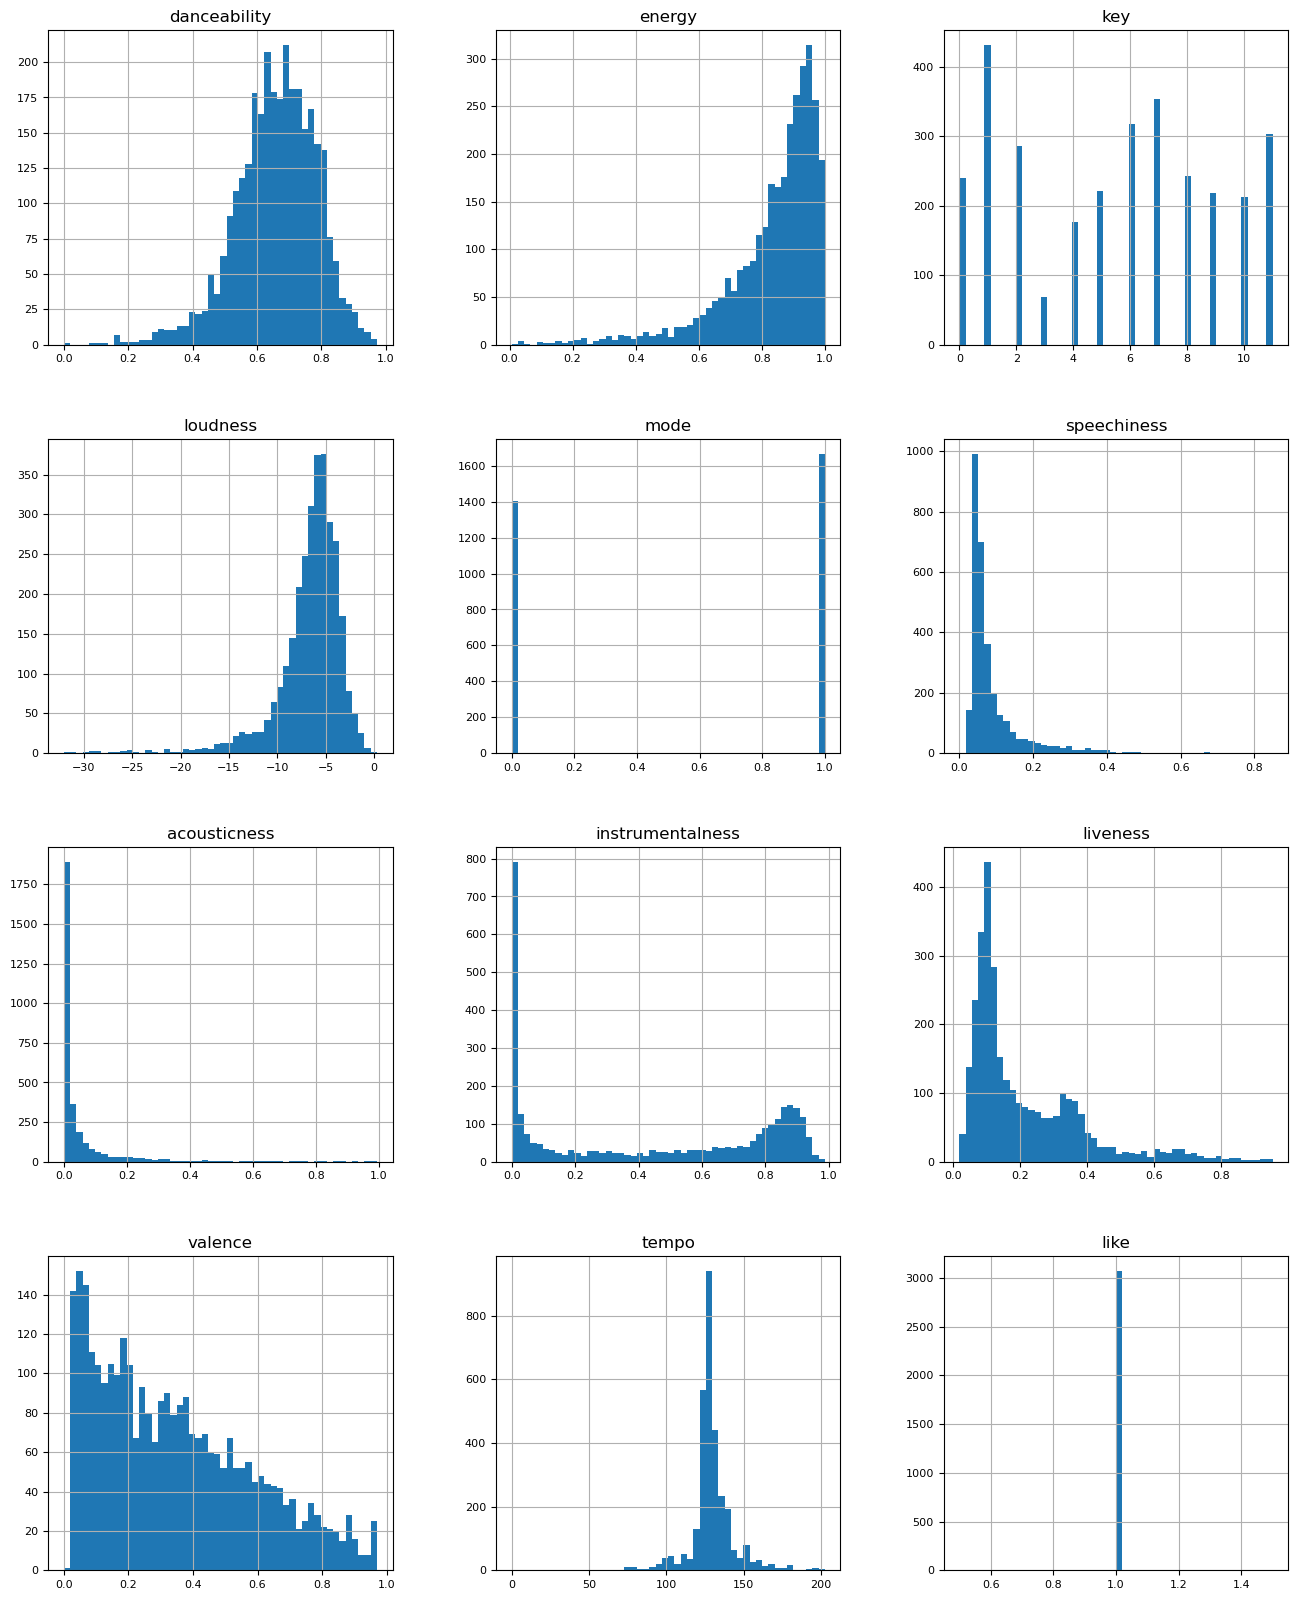

In [ ]:
# display the dataframe in a histogram
techno_songs.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


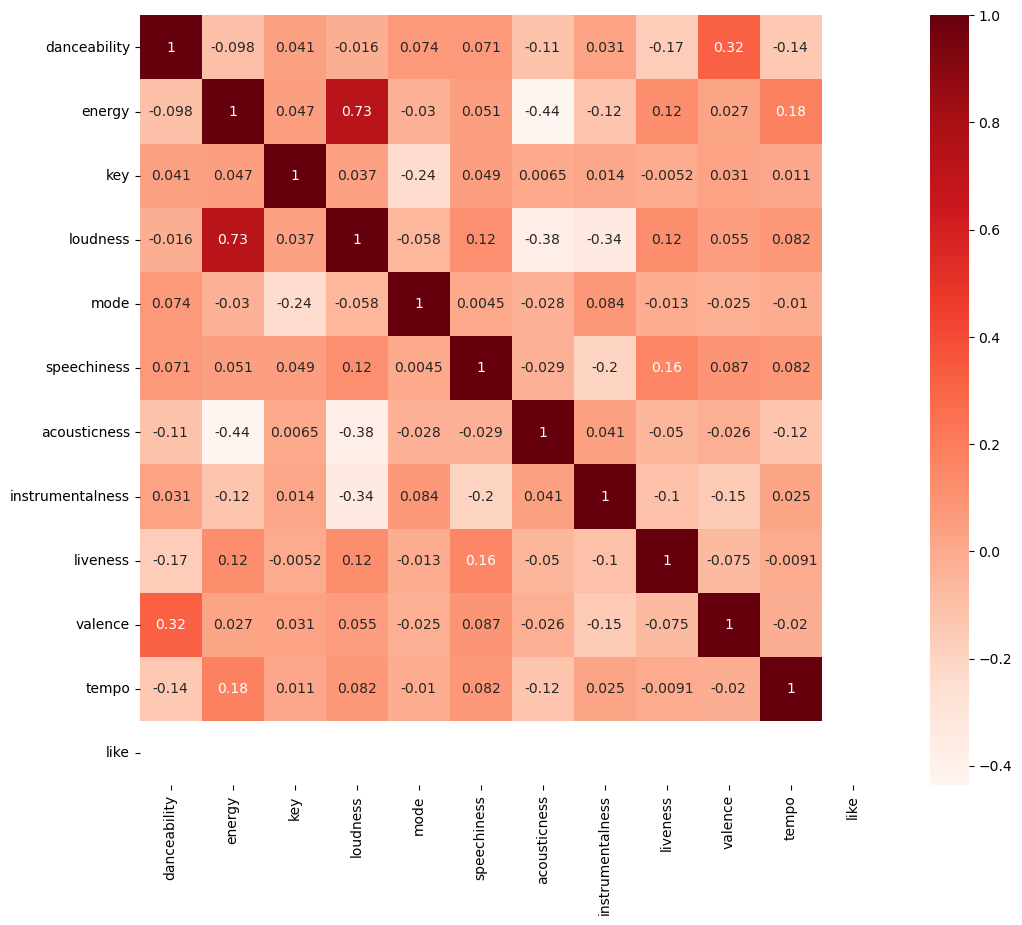

In [ ]:
# find the correlation between the features
corr = techno_songs.corr()
corr

# display the correlation in a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()





In [ ]:
# based on the techno_songs values, create a new dataframe that has normalized values
techno_songs_norm = techno_songs.copy()
techno_songs_norm[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = techno_songs_norm[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
techno_songs_norm.describe()
# find the correlation between the normalized features and display in a heatmap
corr_norm = techno_songs_norm.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,like
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.0
mean,0.677323,0.833079,0.496271,0.784778,0.542643,0.103267,0.055206,0.445420,0.207683,0.352945,0.637418,1.0
std,0.129631,0.155316,0.323587,0.106591,0.498259,0.092363,0.124584,0.376475,0.183037,0.247335,0.069466,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.601233,0.778505,0.181818,0.751334,0.000000,0.052621,0.001789,0.016388,0.080745,0.142268,0.616939,1.0
50%,0.686536,0.881198,0.545455,0.806056,1.000000,0.069376,0.009817,0.472644,0.128293,0.312371,0.631732,1.0
75%,0.768756,0.939592,0.727273,0.847720,1.000000,0.108657,0.044591,0.838906,0.307400,0.527062,0.656515,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


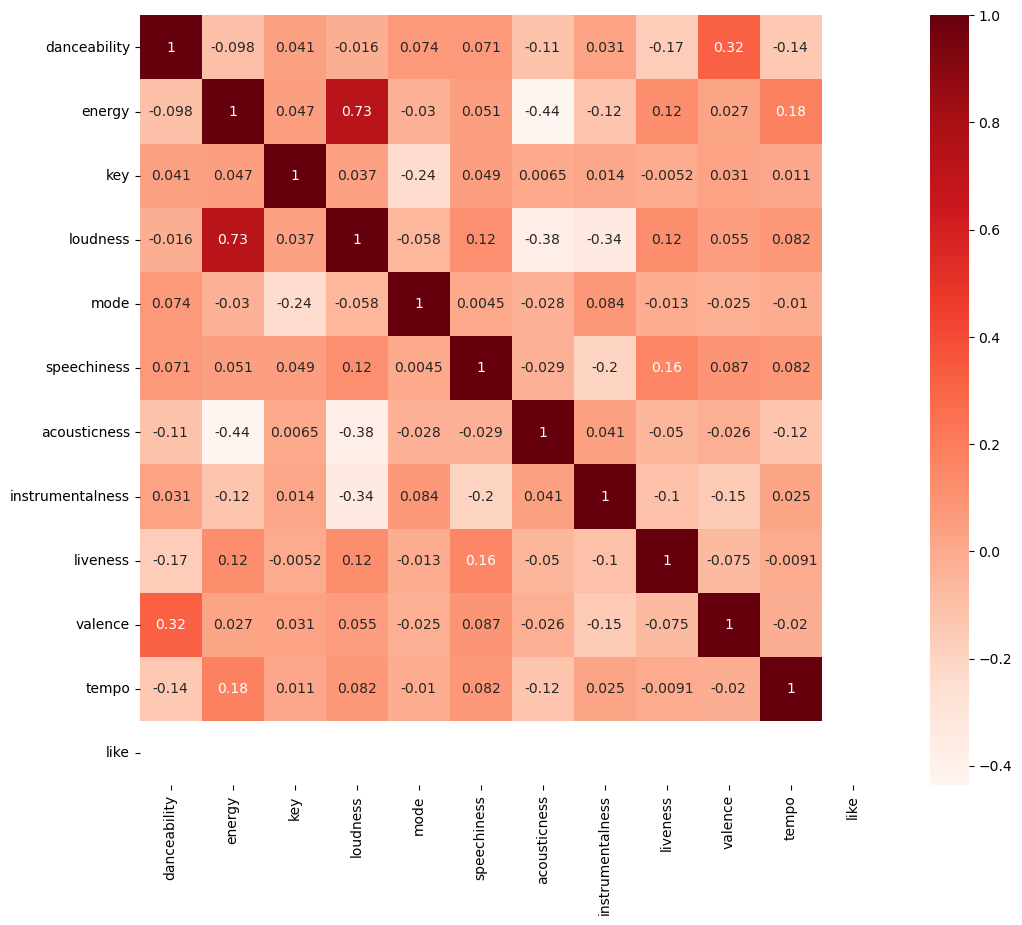

In [16]:
# find the correlation between the normalized features and display in a heatmap
corr_norm = techno_songs_norm.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_norm, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# remove the upper triangle of the correlation matrix
upper_norm = corr_norm.where(np.triu(np.ones(corr_norm.shape), k=1).astype(np.bool))

# only find the top 4 feature pairs that have the highest correlation
strong_corr_norm = upper_norm.stack().sort_values(ascending=False).iloc[0:4]
strong_corr_norm

C:\Users\USER\AppData\Local\Temp\ipykernel_30740\824417113.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_norm = corr_norm.where(np.triu(np.ones(corr_norm.shape), k=1).astype(np.bool))


energy        loudness    0.727919
danceability  valence     0.317634
energy        tempo       0.176335
speechiness   liveness    0.155015
dtype: float64

In [18]:
# remove the upper triangle of the correlation matrix 
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


# only find the top 4 feature pairs that have the highest correlation
strong_corr = upper.stack().sort_values(ascending=False).iloc[0:4]
strong_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_30740\1889419626.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


energy        loudness    0.727919
danceability  valence     0.317634
energy        tempo       0.176335
speechiness   liveness    0.155015
dtype: float64

In [19]:
# split the dataframe from techno_songs into 20% test set and 80% training set
techno_train_songs, techno_test_songs = train_test_split(techno_songs, test_size=0.2)
X_train = pd.concat([techno_train_songs.drop(['song_name', 'artist_name','mode', 'key', 'like'], axis=1), train_songs.drop(['song_name', 'artist_name','mode', 'key', 'like'], axis=1)])
y_train = pd.concat([techno_train_songs['like'], train_songs['like']])
X_test =  pd.concat([techno_test_songs.drop(['song_name', 'artist_name','mode', 'key', 'like'], axis=1), test_songs.drop(['song_name', 'artist_name','mode', 'key', 'like'], axis=1)])
y_test = pd.concat([techno_test_songs['like'], test_songs['like']])
y_train = y_train.astype(int)
y_test = y_test.astype(int)



Text(0.5, 0, 'Number of Neighbors')

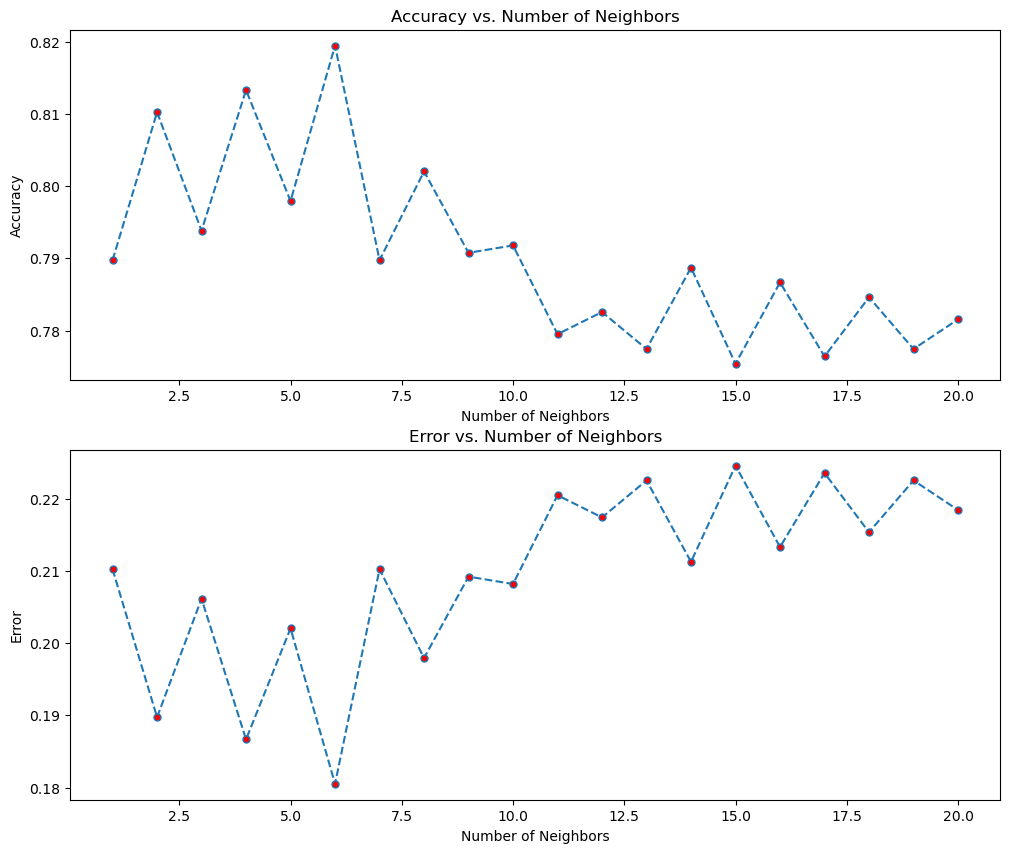

In [22]:
fig, axes = plt.subplots(6, 3, figsize=(12, 10))
neighbors = np.arange(1, 21,1)
accuracy = list()
error = list()

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  accuracy.append(knn.score(X_test, y_test))
  error.append(np.mean(y_test != knn.predict(X_test)))

plt.subplot(2, 1, 1)
plt.plot(neighbors, accuracy, linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Accuracy vs. Number of Neighbors')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')

plt.subplot(2, 1, 2)
plt.plot(neighbors, error, linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error vs. Number of Neighbors')
plt.ylabel('Error')
plt.xlabel('Number of Neighbors')

In [23]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 0.7815384615384615


In [27]:

# Fetch a number of random songs from Spotify (this is a simplified example, actual implementation may differ)
results = sp.search(q='genre:"Electronic"', limit=20)

# Extract song IDs
song_ids = [track['id'] for track in results['tracks']['items']]

# Get audio features for these songs
audio_features = sp.audio_features(song_ids)

# Create a DataFrame from the audio features
songs_df = pd.DataFrame(audio_features)

# Drop unnecessary columns from the DataFrame
songs_df = songs_df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'mode', 'key','duration_ms','time_signature'], axis=1)

# Use the KNN model to predict whether you'll like the songs
predictions = knn.predict(songs_df)

# Create a DataFrame of the songs and predictions
songs_and_predictions = pd.DataFrame({
    'prediction': predictions,
    'song_id': song_ids,
    'song_name': [next((item['name'] for item in results['tracks']['items'] if item['id'] == song_id), '') for song_id in song_ids],
    'artist_name': [next((item['artists'][0]['name'] for item in results['tracks']['items'] if item['id'] == song_id), '') for song_id in song_ids]
})


# Print the DataFrame
songs_and_predictions

,prediction,song_id,song_name,artist_name
0,1,0ITaSRuI0L1RNL7ZNYTTi7,U Are My High (with Future),DJ Snake
1,1,0lYBSQXN6rCTvUZvg9S0lU,Let Me Love You,DJ Snake
2,1,0g5EKLgdKvNlln7TNqBByK,Middle,DJ Snake
3,0,2oDqmfa2g8W893LlwJG1qu,Closer,Nine Inch Nails
4,1,57kR5SniQIbsbVoIjjOUDa,You Know You Like It,DJ Snake
5,0,4LIM4qmpHABufePRrLWbiM,QKThr,Aphex Twin
6,0,2qLSXZuIHMsKydCEFDchc3,Bang Bang Bang Bang,Sohodolls
7,0,4w8niZpiMy6qz1mntFA5uM,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake
8,1,3OaunNUlXXs5e2PXtNAzzG,UCLA,RL Grime
9,1,67awxiNHNyjMXhVgsHuIrs,Turn Down for What,DJ Snake


In [ ]:
# get the cosine similarity matrix, exclude the ids in dislike songs
cosine_similarity(standardized_favorite_songs_values, standardized_unheard_notliked_songs_values[~unheard_notliked_songs['id'].isin(dislike_song_ids)])
cosine_sim_matrix[:10]